X shape: (1797, 64), y shape: (1797,)


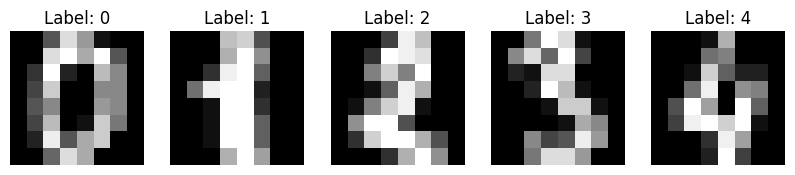

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target
print(f"X shape: {X.shape}, y shape: {y.shape}")

# 2. Visualize a few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

# 3. Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy for K=3: 0.9694
Accuracy for K=5: 0.9750
Accuracy for K=7: 0.9722
Accuracy for K=9: 0.9722


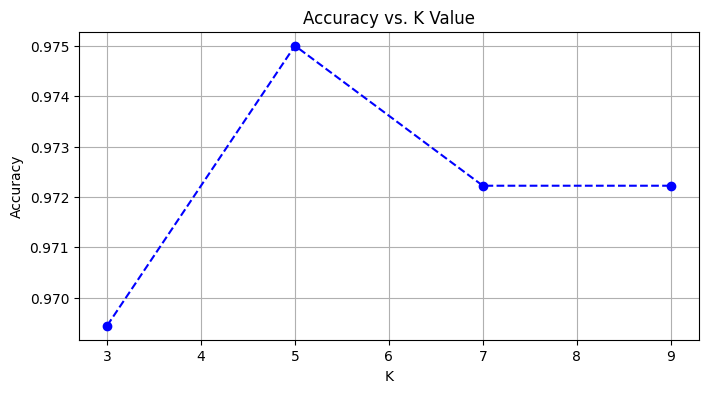

In [2]:
# Training and Finding the Best K
# 5 & 6. Try multiple K values
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for K={k}: {acc:.4f}")

# 7. Plot Accuracy vs K
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

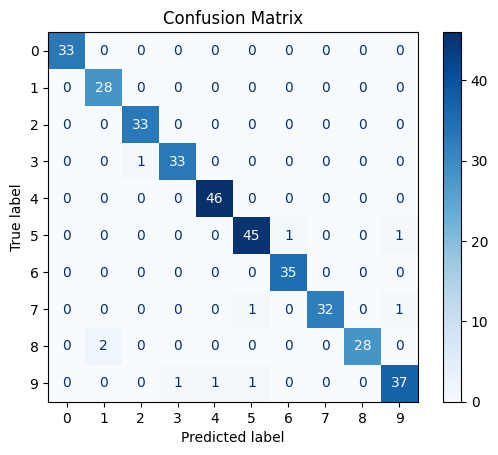

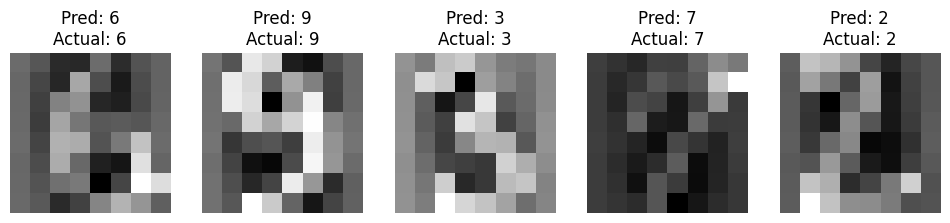

In [3]:
# Evaluation and Results
# 8. Confusion Matrix for the last model (K=9)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 9. Display 5 test images with predictions
y_pred_final = knn.predict(X_test)
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    # Reshape back to 8x8 for display
    image = X_test[i].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Pred: {y_pred_final[i]}\nActual: {y_test[i]}")
    ax.axis('off')
plt.show()